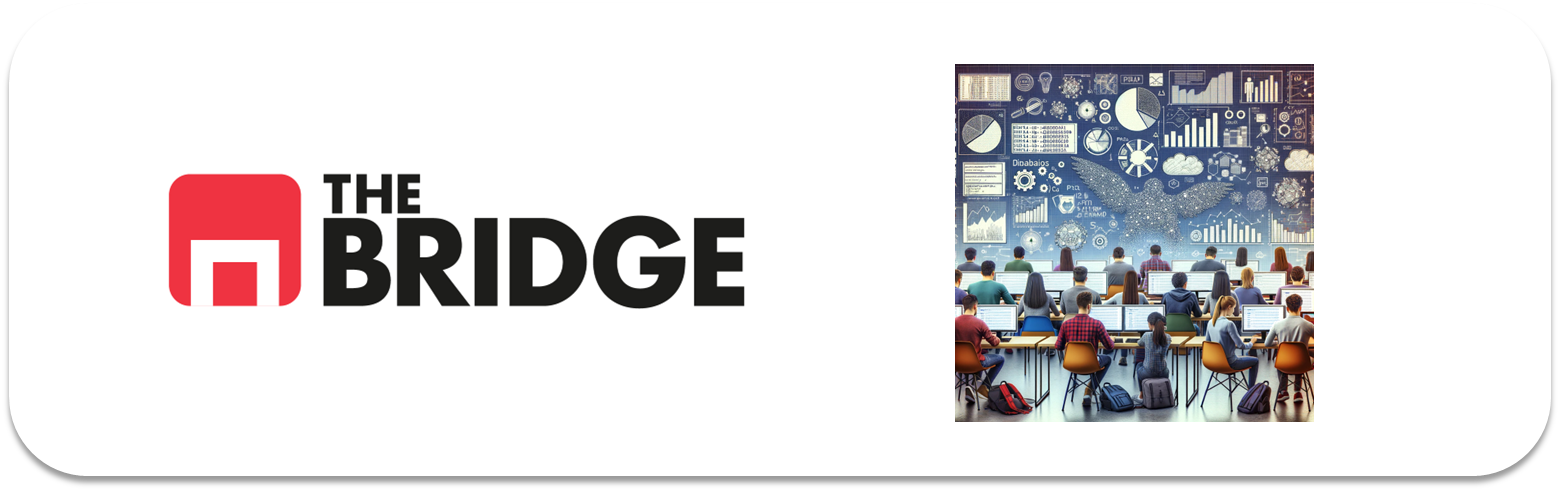

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset de
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable targl Titanic. et de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



1. carga del dataset

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
df_titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
150,0,2,male,51.0,0,0,12.5250,S,Second,man,True,NaN,Southampton,no,True
648,0,3,male,NaN,0,0,7.5500,S,Third,man,True,NaN,Southampton,no,True
160,0,3,male,44.0,0,1,16.1000,S,Third,man,True,NaN,Southampton,no,False
590,0,3,male,35.0,0,0,7.1250,S,Third,man,True,NaN,Southampton,no,True
175,0,3,male,18.0,1,1,7.8542,S,Third,man,True,NaN,Southampton,no,False
834,0,3,male,18.0,0,0,8.3000,S,Third,man,True,NaN,Southampton,no,True
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
552,0,3,male,NaN,0,0,7.8292,Q,Third,man,True,NaN,Queenstown,no,True
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
575,0,3,male,19.0,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,True


2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

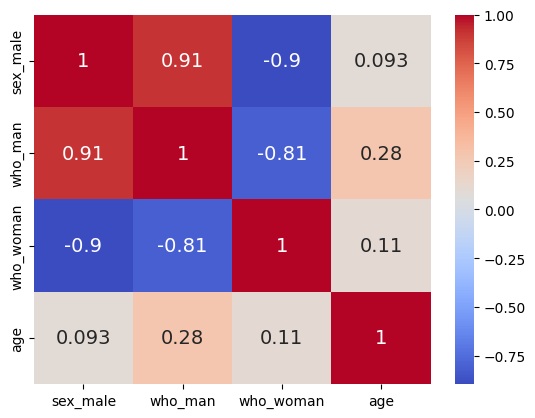

In [5]:
df_dummies = pd.get_dummies(df_titanic[["sex", "who"]], drop_first=True)
df_dummies["age"] = df_titanic["age"]

sns.heatmap(df_dummies.corr(), annot=True, cmap="coolwarm")
plt.show()

Al analizar la matriz de correlación entre sex, age y who, se observa que who está muy correlacionada con sex (correlaciones cercanas a ±0.9). Esto ocurre porque who se construye directamente a partir de sex y age (‘man’, ‘woman’, ‘child’).
Esta relación tan fuerte indica multicolinealidad: varias variables aportan prácticamente la misma información. Para evitar duplicar información en el modelo y mantenerlo más estable e interpretable, decido eliminar who y quedarme con sex y age, que son las variables originales.


In [13]:
df = df_titanic.drop(columns=["class", "embarked", "alive", "adult_male", "who", "deck"], axis=1)

In [14]:
df.duplicated().sum()

np.int64(111)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     780 non-null    int64  
 1   pclass       780 non-null    int64  
 2   sex          780 non-null    object 
 3   age          676 non-null    float64
 4   sibsp        780 non-null    int64  
 5   parch        780 non-null    int64  
 6   fare         780 non-null    float64
 7   embark_town  778 non-null    object 
 8   alone        780 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 55.6+ KB


3. Escoge y analiza la variable targl Titanic. et de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

In [17]:
df.rename(columns = {'survived': 'target'}, inplace=True)

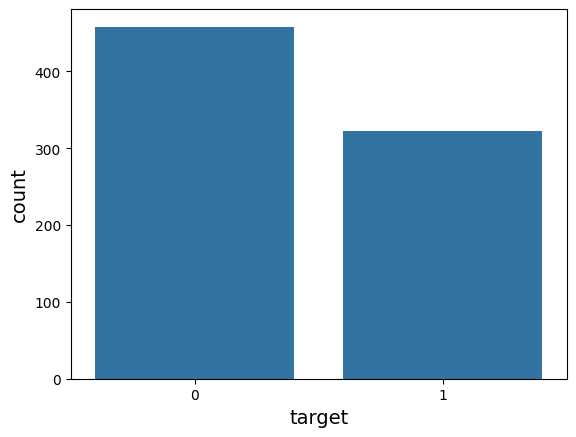

In [18]:
sns.countplot(data=df, x='target');

- La gráfica no está balanceado hay más casos de clase 0(no sobrevivieron) que de clase 1(sobrevivieron). Esto impacta en la evaluación: métricas como accuracy pueden ser engañosas si el modelo se limita a predecir siempre la clase mayoritaria.

4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.

In [20]:
df_clean = df.dropna(subset=["embark_town"])

Para cumplir con el requisito de mantener una distribución similar de pasajeros embarcados en las tres ciudades en los conjuntos de entrenamiento y test, se eliminan únicamente las dos filas que contienen valores nulos en embark_town.

In [21]:
X = df_clean.drop(columns=["target"])
y = df_clean["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df_clean["embark_town"])

6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.

In [22]:
mean_age = X_train["age"].mean()
X_train["age"] = X_train["age"].fillna(mean_age)

7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

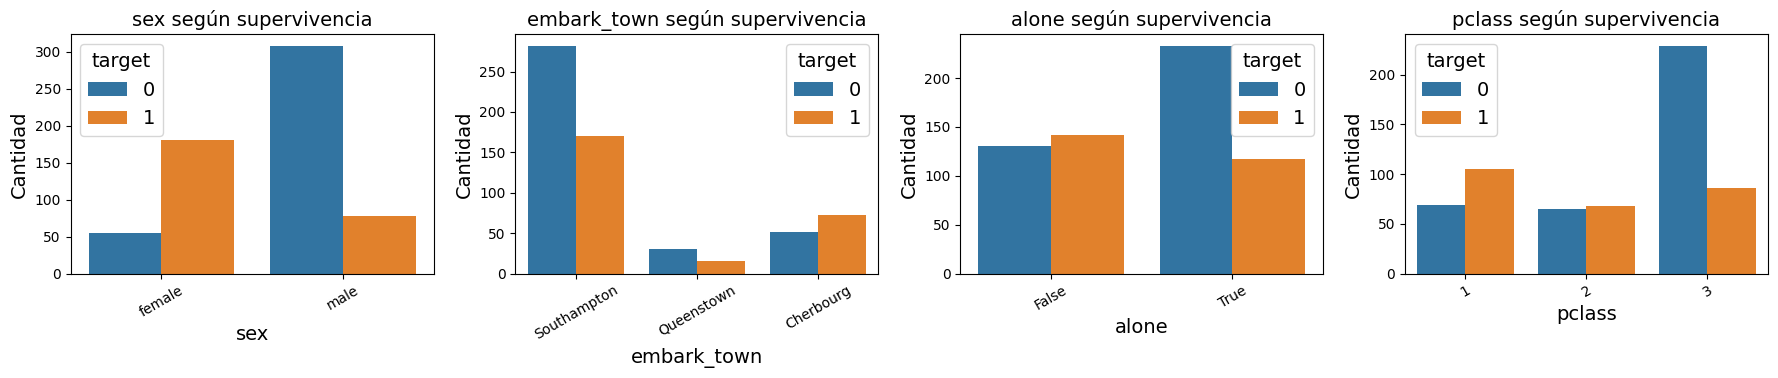

In [26]:
variables_cat = ["sex", "embark_town", "alone", "pclass"]

fig, axes = plt.subplots(1, len(variables_cat), figsize=(18, 4))

for i, var in enumerate(variables_cat):
    sns.countplot(data=X_train, x=var, hue=y_train, ax=axes[i])
    axes[i].set_title(f"{var} según supervivencia")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Cantidad")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

- sex: mujeres sobreviven más.
- embark_town: dependiendo de la ciudad de embarque se sobrevive más o menos.
- alone: quienes no viajaban acompañados parecen tener más probabilidad de sobrevivir.
- pclass: primera clase tiene más sobrevivientes.


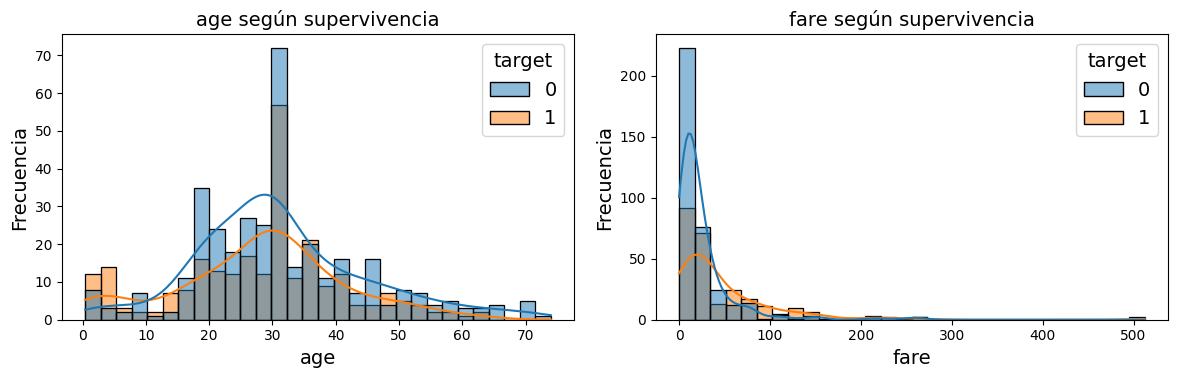

In [ ]:
variables_num = ["age", "fare"]

fig, axes = plt.subplots(1, len(variables_num), figsize=(12, 4))

for i, var in enumerate(variables_num):
    sns.histplot(data=X_train, x=var, hue=y_train, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"{var} según supervivencia")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

- Ambas variables muestran patrones diferenciados entre sobrevivientes y fallecidos.



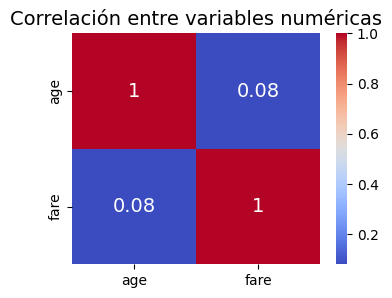

In [29]:
plt.figure(figsize=(4, 3))
sns.heatmap(X_train[["age", "fare"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables numéricas")
plt.show()

- La correlación entre age y fare es 0.08, lo que significa que no hay multicolinealidad entre ellas.


- Mantengo las variables seleccionadas (pclass, sex, age, fare, embark_town, alone) porque todas ellas muestran patrones diferenciados en relación con la variable target, lo que indica que aportan información relevante para predecir la supervivencia.



8. Trata las variables para que funcionen lo mejor posible en el modelo.

In [50]:
features_num = ["age", "fare"]
features_cat = ["sex", "embark_town", "alone", "pclass"]

In [51]:
X_train_encoded = pd.get_dummies(X_train, columns=features_cat, drop_first=True)

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

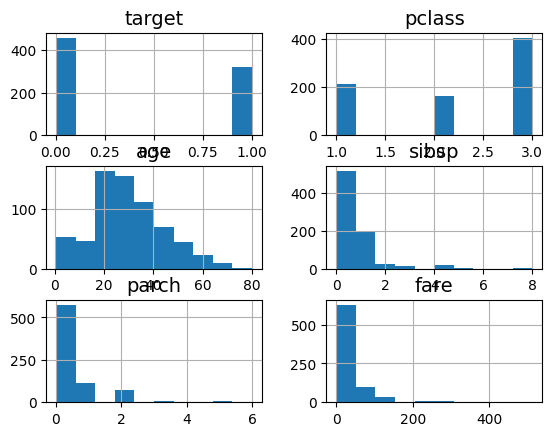

In [44]:
df.hist()

In [45]:
X_train[features_num].describe()

,age,fare
count,622.000000,622.000000
mean,29.927315,34.702009
std,13.628266,50.156041
min,0.420000,0.000000
25%,22.000000,8.050000
50%,29.927315,16.100000
75%,36.000000,35.375000
max,74.000000,512.329200


Como age y fare tienen valores mínimos y máximos muy distintos entre sí, es mejor escalarlas para que el modelo no dé más importancia a una variable solo por tener números más grandes.

9. Construye un modelo de regresión logística.

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 5000)

log_reg.fit(X_train_encoded, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

11. Procesa el dataset de Test para que puedas usarlo en la evaluación 

In [55]:
X_test["age"] = X_test["age"].fillna(mean_age)

In [56]:
X_test_encoded = pd.get_dummies(X_test, columns=features_cat, drop_first=True)

- Alineo columnas entre train y test porque puede pasar que alguna categoría no aparezca en test.

In [57]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join="left", axis=1)
X_test_encoded = X_test_encoded.fillna(0)

12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.

In [58]:
y_pred_train = log_reg.predict(X_train_encoded)
y_pred_test = log_reg.predict(X_test_encoded)

In [60]:
y_train.value_counts(True)

target
0    0.583601
1    0.416399
Name: proportion, dtype: float64

In [61]:
y_test.value_counts(True)

target
0    0.608974
1    0.391026
Name: proportion, dtype: float64

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("TRAIN METRICS")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

print("\nTEST METRICS")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

TRAIN METRICS
Accuracy: 0.797427652733119
Precision: 0.7782426778242678
Recall: 0.7181467181467182
F1: 0.7469879518072289

TEST METRICS
Accuracy: 0.7628205128205128
Precision: 0.7222222222222222
Recall: 0.639344262295082
F1: 0.6782608695652174


El modelo de regresión logística muestra un rendimiento consistente entre los datos de entrenamiento y de test, lo que indica una buena capacidad de generalización:
- Accuracy: 0.80 en entrenamiento vs. 0.76 en test
- Precision: 0.78 en entrenamiento vs. 0.72 en test
- F1 score: 0.75 en entrenamiento vs. 0.68 en test
- Recall en test: 0.64


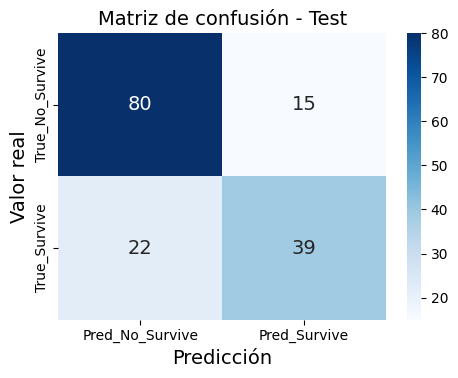

In [62]:
# Generar matriz de confusión
c_matrix = confusion_matrix(y_test, log_reg.predict(X_test_encoded))

# Crear DataFrame con etiquetas personalizadas
c_matrix_df = pd.DataFrame(c_matrix,
                           columns=['Pred_No_Survive', 'Pred_Survive'],
                           index=['True_No_Survive', 'True_Survive'])

plt.figure(figsize=(5, 4))
sns.heatmap(c_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title("Matriz de confusión - Test")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()

 La matriz de confusión en test muestra que el modelo identifica correctamente la mayoría de los casos negativos (no sobrevivientes) y una proporción relevante de positivos (sobrevivientes), aunque aún se observan algunos falsos negativos.

Su comportamiento en el conjunto de test confirma que es capaz de capturar patrones reales del problema sin depender excesivamente de los datos de entrenamiento.

AUROC: 0.79


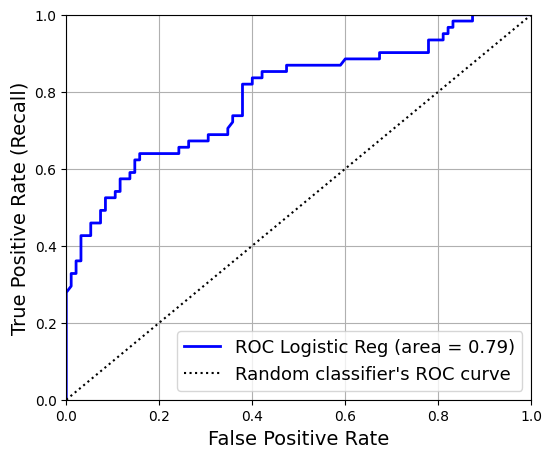

In [63]:
from sklearn.metrics import roc_curve, auc

# Probabilidades del modelo (clase positiva = 1)
scores = log_reg.predict_proba(X_test_encoded)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, scores[:, 1])
roc_auc = auc(fpr, tpr)

print("AUROC: %.2f" % roc_auc)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, color="blue",
         label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

La curva ROC muestra que el modelo tiene una buena capacidad para distinguir entre supervivientes y no supervivientes. El AUROC de 0.79 indica que el modelo es significativamente mejor que uno aleatorio, aunque no perfecto. Esto confirma que el modelo tiene valor predictivo y generaliza bien.